# Project : Analyzing the trends of COVID-19 with Python.


**Problem Statement:**
Given data about COVID-19 patients, write code to visualize the impact and
analyze the trend of rate of infection and recovery as well as make predictions
about the number of cases expected a week in future based on the current
trends.

Dataset:
CSV and Excel files containing data about the number of COVID-19 confirmed
deaths and recovered patients both around the world and in India. Download Link
Guidelines:

● Use pandas to accumulate data from multiple data files.

● Use plotly (visualization library) to create interactive visualizations.

● Use Facebook prophet library to make time series models.

● Visualize the prediction by combining these technologies

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import warnings

In [6]:
data=pd.read_csv("/covid_19_clean_complete.csv")

In [7]:
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [8]:
data.rename(columns={"Date":"date","Province/State":"state","Country/Region":"country","Lat":"lat","Long":"long",
                     "Confirmed":"confirmed","Deaths":"deaths","Recovered":"recovered","Active":"active"},inplace=True)

In [9]:
data

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [10]:
data["active"] = data["confirmed"] - data["deaths"] - data["recovered"]

In [11]:
data

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [12]:
data.tail()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [15]:
#to find all the cases on last value in date
top = data[data["date"] == data["date"].max()]

In [16]:
top

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [17]:
w = top.groupby("country")["confirmed","active","deaths"].sum().reset_index()

<ipython-input-17-d642e0d7fe05>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  w = top.groupby("country")["confirmed","active","deaths"].sum().reset_index()


In [18]:
w

,country,confirmed,active,deaths
0,Afghanistan,36263,9796,1269
1,Albania,4880,1991,144
2,Algeria,27973,7973,1163
3,Andorra,907,52,52
4,Angola,950,667,41
...,...,...,...,...
182,West Bank and Gaza,10621,6791,78
183,Western Sahara,10,1,1
184,Yemen,1691,375,483
185,Zambia,4552,1597,140


In [19]:
fig=px.choropleth(w,locations='country',locationmode='country names',color='active',hover_name='country',
                 range_color=[1,1500],color_continuous_scale="Peach",title='Active cases Countries')
fig.show()

Text(0, 0.5, 'Cases total')

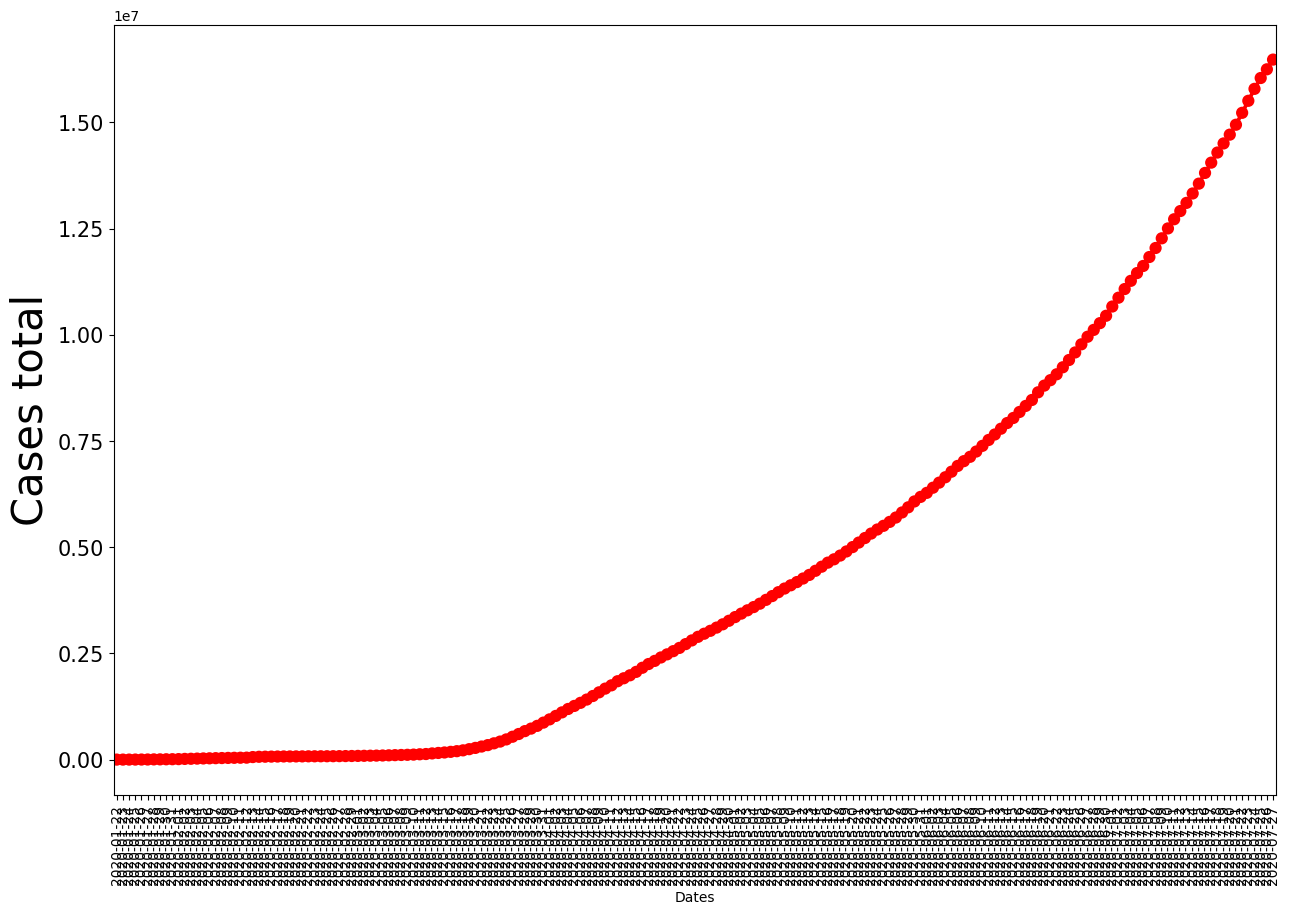

In [20]:
#plot for confirmed cases
plt.figure(figsize=(15,10))

#t_cases=data.groupby('date')['date','confirmed'].sum().reset_index()
t_cases=data.groupby('date')['confirmed'].sum().reset_index()
t_cases['date']=pd.to_datetime(t_cases['date'])

a=sns.pointplot(x=t_cases.date.dt.date,y=t_cases.confirmed,color='r')
a.set(xlabel='Dates',ylabel='Cases total')

plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Dates',fontsize=10)
plt.ylabel('Cases total',fontsize=30)

In [21]:
t_cases

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [22]:
t_actives = top.groupby(by="country")["active"].sum().sort_values(ascending=False).reset_index()

In [23]:
t_actives

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
...,...,...
182,Holy See,0
183,San Marino,0
184,Brunei,0
185,Dominica,0


Text(0, 0.5, 'Countryl')

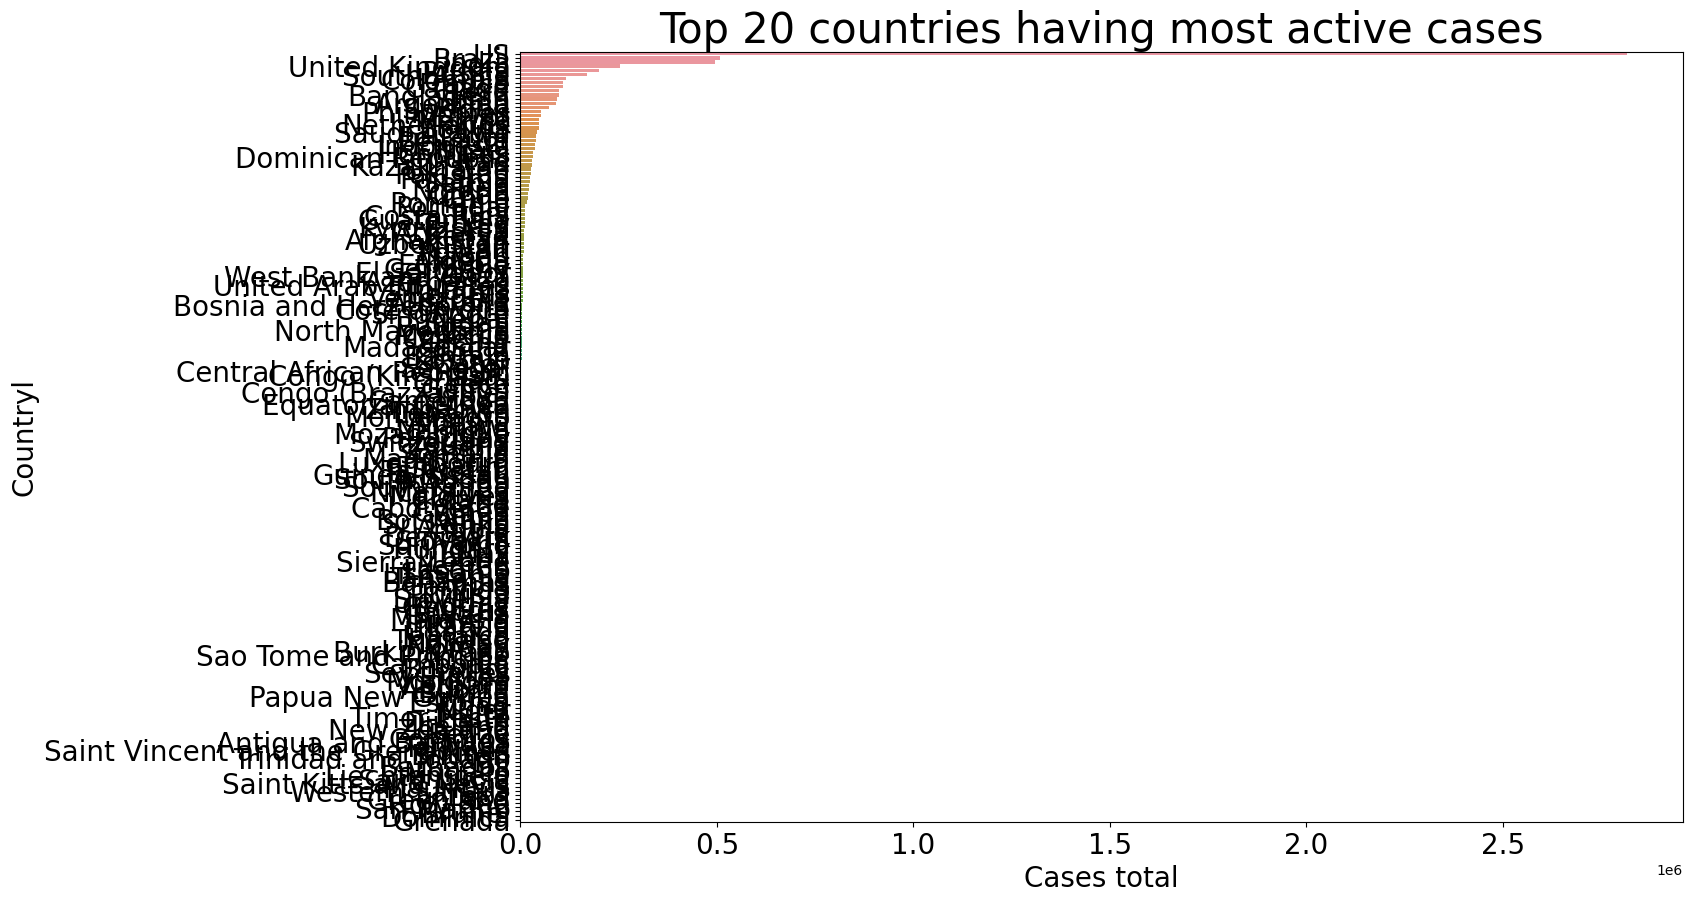

In [24]:
plt.figure(figsize=(15,10))
plt.title('Top 20 countries having most active cases',fontsize=30)
a=sns.barplot(x=t_actives.active,y=t_actives.country)
#for i,(value,name) in enumerate(zip(t_actives.active,t_actives.country)):
#    a.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cases total',fontsize=20)
plt.ylabel('Countryl',fontsize=20)

In [25]:
t_deaths = top.groupby(by="country")["deaths"].sum().sort_values(ascending=False).head(20).reset_index()

In [27]:
t_deaths

,country,deaths
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


# Top 20 countries having most death

Text(0, 0.5, 'Country')

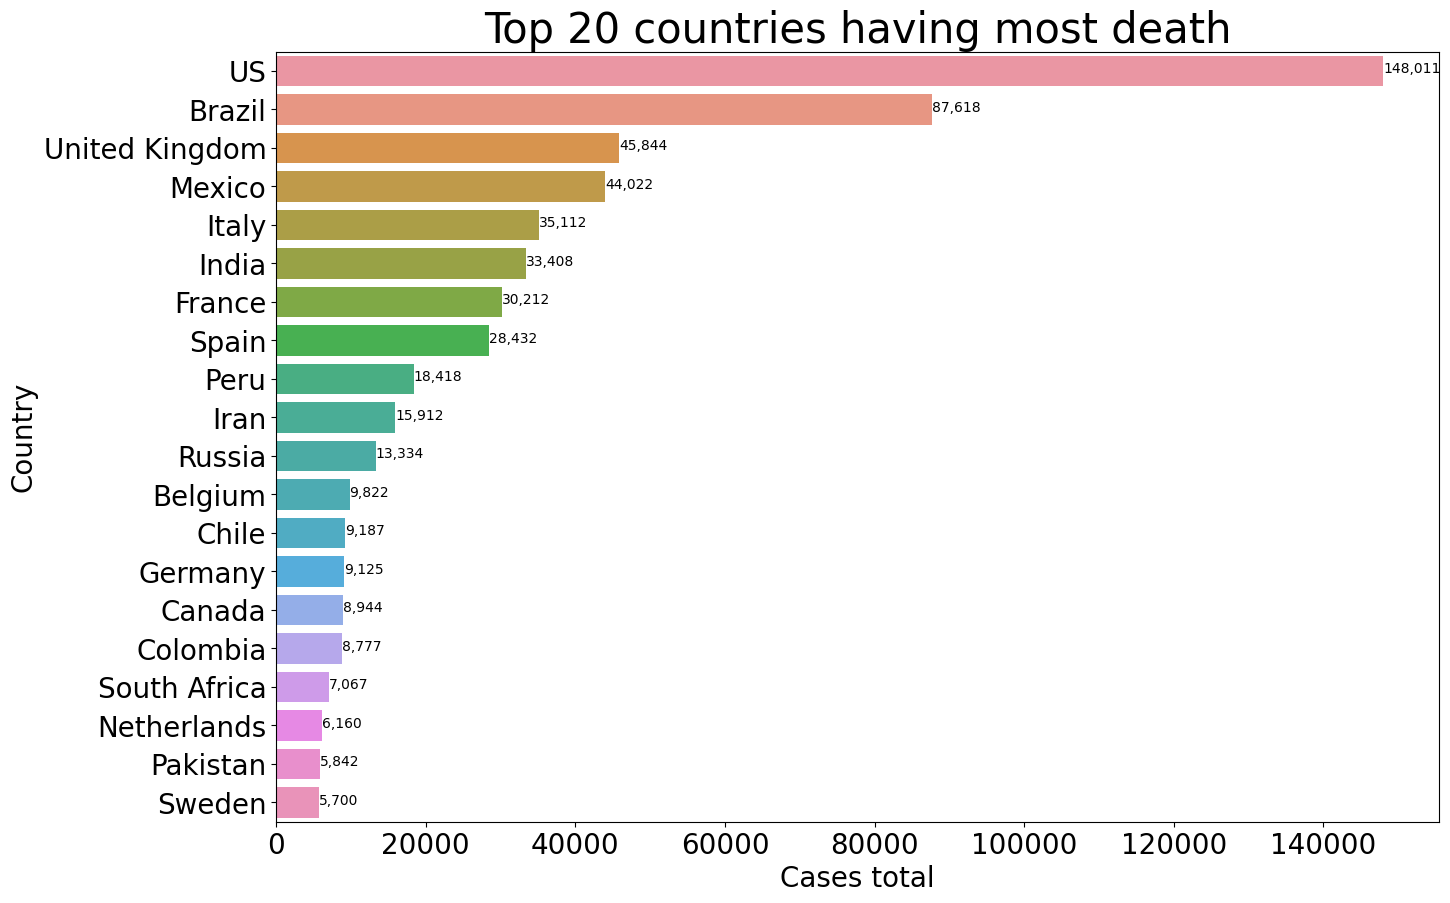

In [28]:
plt.figure(figsize=(15,10))

plt.title('Top 20 countries having most death',fontsize=30)
a=sns.barplot(x=t_deaths.deaths,y=t_deaths.country)
for i,(value,name) in enumerate(zip(t_deaths.deaths,t_deaths.country)):
    a.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cases total',fontsize=20)
plt.ylabel('Country',fontsize=20)

In [40]:
recover = top.groupby(by="country")["recovered"].sum().sort_values(ascending=False).head(20).reset_index()

In [41]:
recover

,country,recovered
0,Brazil,1846641
1,US,1325804
2,India,951166
3,Russia,602249
4,Chile,319954
5,Mexico,303810
6,South Africa,274925
7,Peru,272547
8,Iran,255144
9,Pakistan,241026


Text(0, 0.5, 'Country')

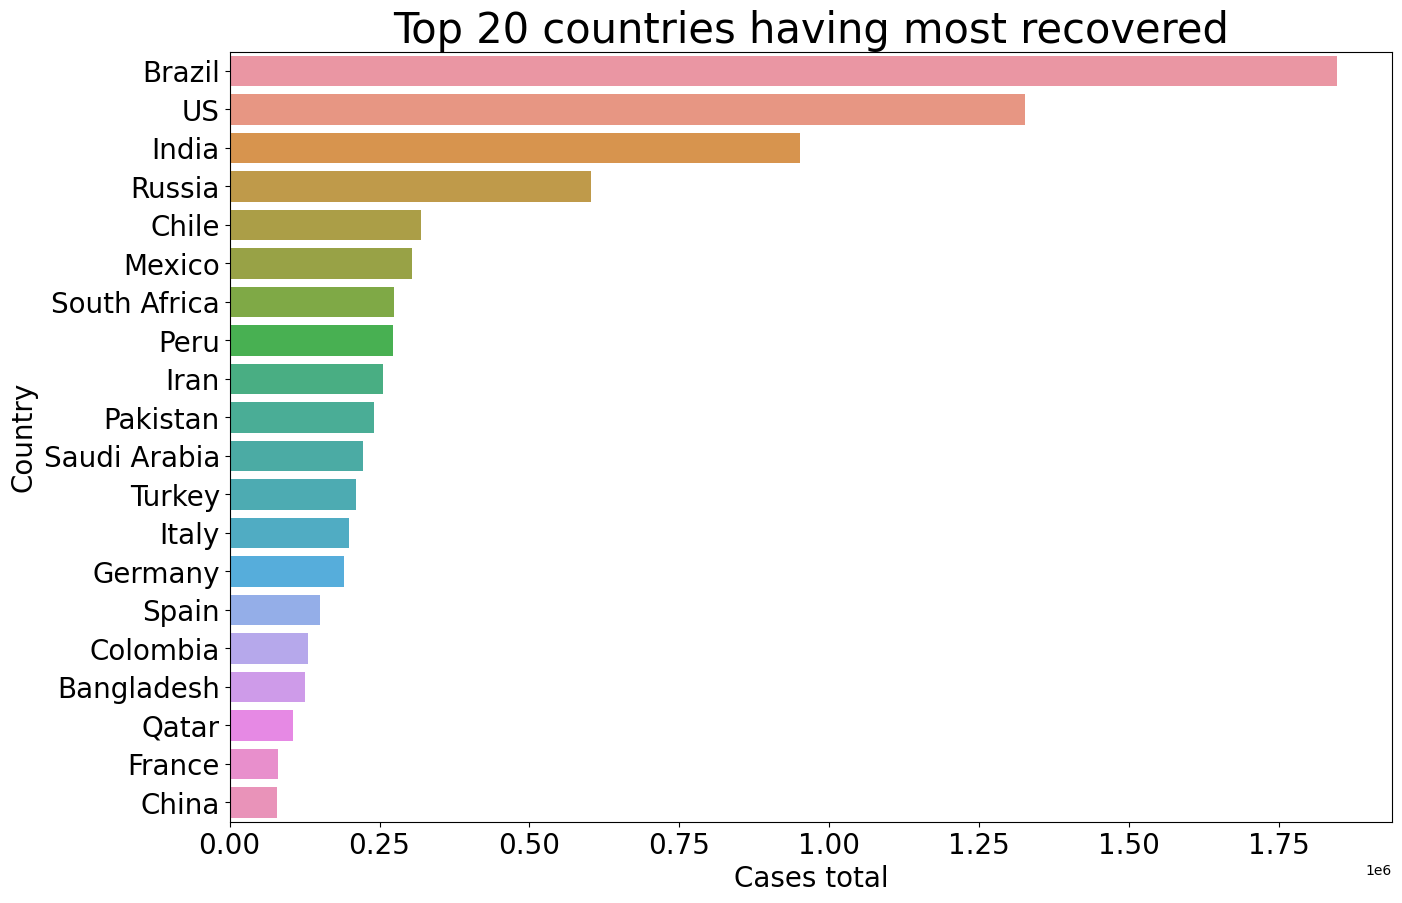

In [42]:
plt.figure(figsize=(15,10))

plt.title('Top 20 countries having most recovered',fontsize=30)
a=sns.barplot(x=recover.recovered,y=recover.country)
#for i,(value,name) in enumerate(zip(recover.recovered,recover.country)):
   # a.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cases total',fontsize=20)
plt.ylabel('Country',fontsize=20)

In [43]:
Brazil = data[data.country=="Brazil"]
Brazil = Brazil.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()

<ipython-input-43-bc29f2033d02>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [44]:
Brazil

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1620313,84082,2287475,583080
184,2020-07-24,1693214,85238,2343366,564914
185,2020-07-25,1785359,86449,2394513,522705
186,2020-07-26,1812913,87004,2419091,519174


In [50]:
US = data[data.country=="US"]
US = US.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()

<ipython-input-50-6b13a57f6296>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [51]:
US

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,1,1
1,2020-01-23,0,0,1,1
2,2020-01-24,0,0,2,2
3,2020-01-25,0,0,2,2
4,2020-01-26,0,0,5,5
...,...,...,...,...,...
183,2020-07-23,1233269,144430,4038816,2661117
184,2020-07-24,1261624,145560,4112531,2705347
185,2020-07-25,1279414,146465,4178970,2753091
186,2020-07-26,1297863,146935,4233923,2789125


In [52]:
Russia= data[data.country=="Russia"]
Russia = Russia.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()


<ipython-input-52-d0ae316c7887>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [53]:
Russia

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,579295,12873,793720,201552
184,2020-07-24,587728,13026,799499,198745
185,2020-07-25,596064,13172,805332,196096
186,2020-07-26,599172,13249,811073,198652


In [54]:
India= data[data.country=="India"]
India= India.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()


<ipython-input-54-37e9d8b43cf3>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [55]:
India

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,817209,30601,1288108,440298
184,2020-07-24,849432,31358,1337024,456234
185,2020-07-25,885573,32060,1385635,468002
186,2020-07-26,917568,32771,1435616,485277


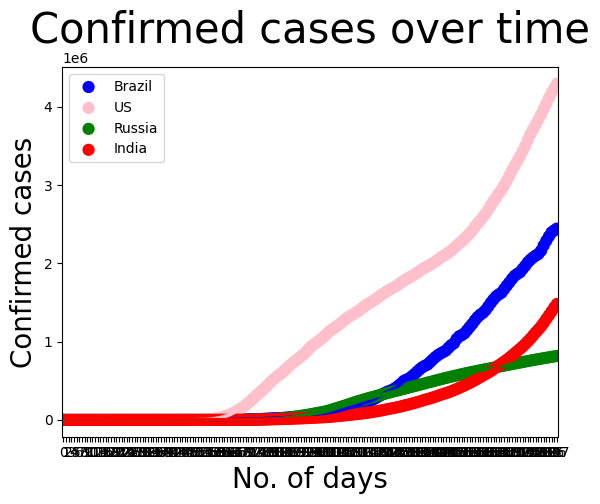

In [56]:
sns.pointplot(data=Brazil, x=Brazil.index, y='confirmed', color="Blue", label="Brazil")
sns.pointplot(data=US, x=US.index, y='confirmed', color="Pink", label="US")
sns.pointplot(data=Russia, x=Russia.index, y='confirmed', color="Green", label="Russia")
sns.pointplot(data=India, x=India.index, y='confirmed', color="Red", label="India")

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Confirmed cases', fontsize=20)
plt.title('Confirmed cases over time', fontsize=30)

# Adding a legend to distinguish the countries
plt.legend()

plt.show()

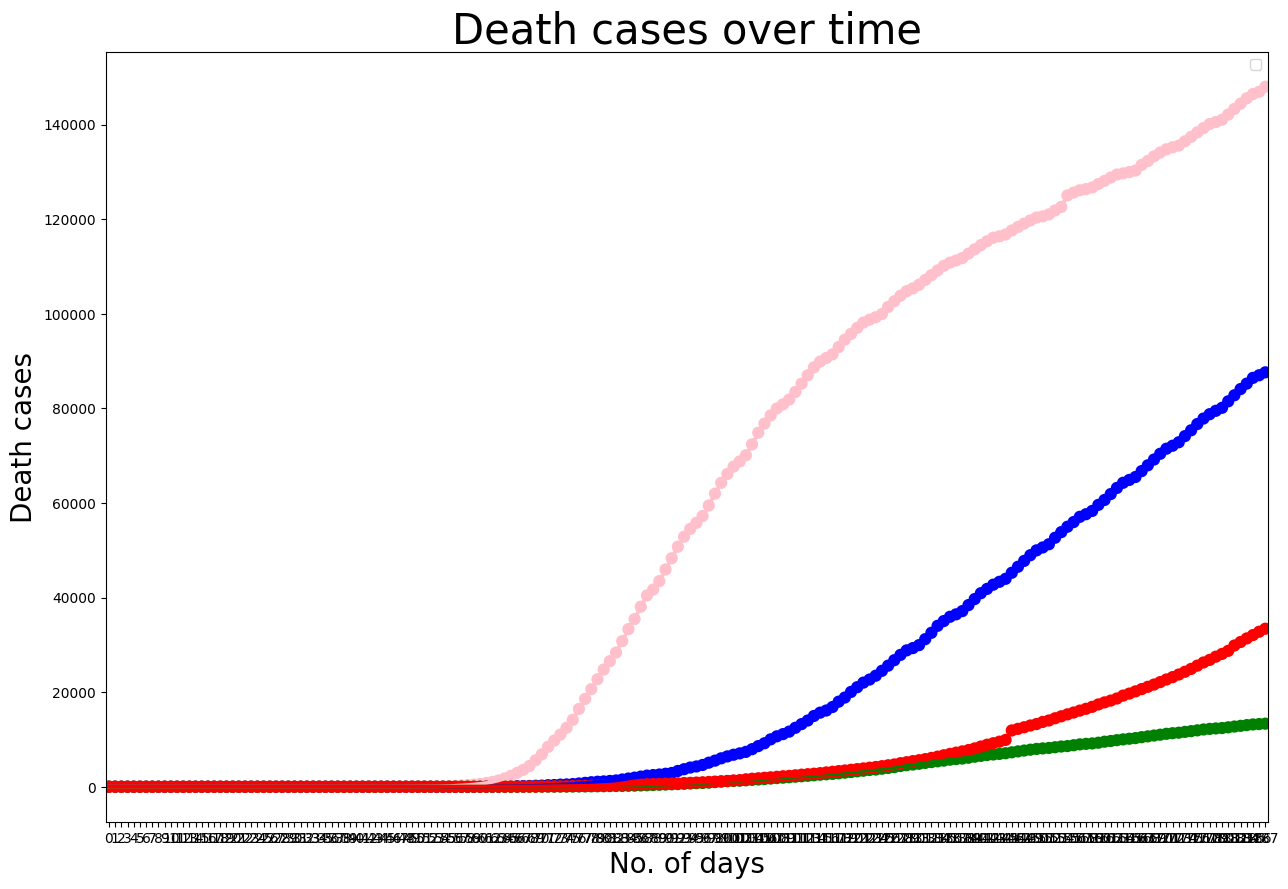

In [57]:
plt.figure(figsize=(15, 10))

# Plotting the data for each country
sns.pointplot(x=Brazil.index, y=Brazil.deaths, color="Blue")
sns.pointplot(x=US.index, y=US.deaths, color="Pink")
sns.pointplot(x=Russia.index, y=Russia.deaths, color="Green")
sns.pointplot(x=India.index, y=India.deaths, color="Red")

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Death cases', fontsize=20)
plt.title('Death cases over time', fontsize=30)
# Adding a legend to distinguish the countries
plt.legend()
plt.show()

**FORCASTING USING FBPROPHET**

In [58]:
pip install prophet

In [59]:
from prophet import Prophet

In [60]:
data.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [61]:
data.groupby("date").sum().head()

<ipython-input-61-371f1ba50e63>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,lat,long,confirmed,deaths,recovered,active
date,,,,,,
2020-01-22,5594.20365,6140.869714,555,17,28,510
2020-01-23,5594.20365,6140.869714,654,18,30,606
2020-01-24,5594.20365,6140.869714,941,26,36,879
2020-01-25,5594.20365,6140.869714,1434,42,39,1353
2020-01-26,5594.20365,6140.869714,2118,56,52,2010


In [62]:
total_active = data["active"].sum()
print("Total no. of active COVID 19 CASES:",total_active)

Total no. of active COVID 19 CASES: 396715350


In [63]:
confirmed = data.groupby("date").sum()["confirmed"].reset_index()

death = data.groupby("date").sum()["deaths"].reset_index()

recovered = data.groupby("date").sum()["recovered"].reset_index()

<ipython-input-63-1d31e3dadc91>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-63-1d31e3dadc91>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-63-1d31e3dadc91>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [64]:
confirmed

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [65]:
confirmed1 = data.groupby("date").sum()

<ipython-input-65-49a6acab5877>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [66]:
confirmed1

,lat,long,confirmed,deaths,recovered,active
date,,,,,,
2020-01-22,5594.20365,6140.869714,555,17,28,510
2020-01-23,5594.20365,6140.869714,654,18,30,606
2020-01-24,5594.20365,6140.869714,941,26,36,879
2020-01-25,5594.20365,6140.869714,1434,42,39,1353
2020-01-26,5594.20365,6140.869714,2118,56,52,2010
...,...,...,...,...,...,...
2020-07-23,5594.20365,6140.869714,15510481,633506,8710969,6166006
2020-07-24,5594.20365,6140.869714,15791645,639650,8939705,6212290
2020-07-25,5594.20365,6140.869714,16047190,644517,9158743,6243930


**FORCAST ON CONFIRMED CASE:**

In [67]:
confirmed.columns = ["ds","y"]
confirmed["ds"] = pd.to_datetime(confirmed["ds"])
confirmed.tail()

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [68]:
m = Prophet(interval_width = 0.95)
m.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz7b8pbhr/65ov2jcw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz7b8pbhr/v5pemv9o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97632', 'data', 'file=/tmp/tmpz7b8pbhr/65ov2jcw.json', 'init=/tmp/tmpz7b8pbhr/v5pemv9o.json', 'output', 'file=/tmp/tmpz7b8pbhr/prophet_model07vlov22/prophet_model-20231207080853.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:08:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:08:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [69]:
future = m.make_future_dataframe(periods = 7,freq="D")
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [70]:
forecast = m.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,1.674391e+07,1.659347e+07,1.691359e+07
191,2020-07-31,1.695910e+07,1.679550e+07,1.713687e+07
192,2020-08-01,1.716676e+07,1.698163e+07,1.735027e+07
193,2020-08-02,1.736430e+07,1.718106e+07,1.754676e+07
194,2020-08-03,1.755889e+07,1.737203e+07,1.773507e+07


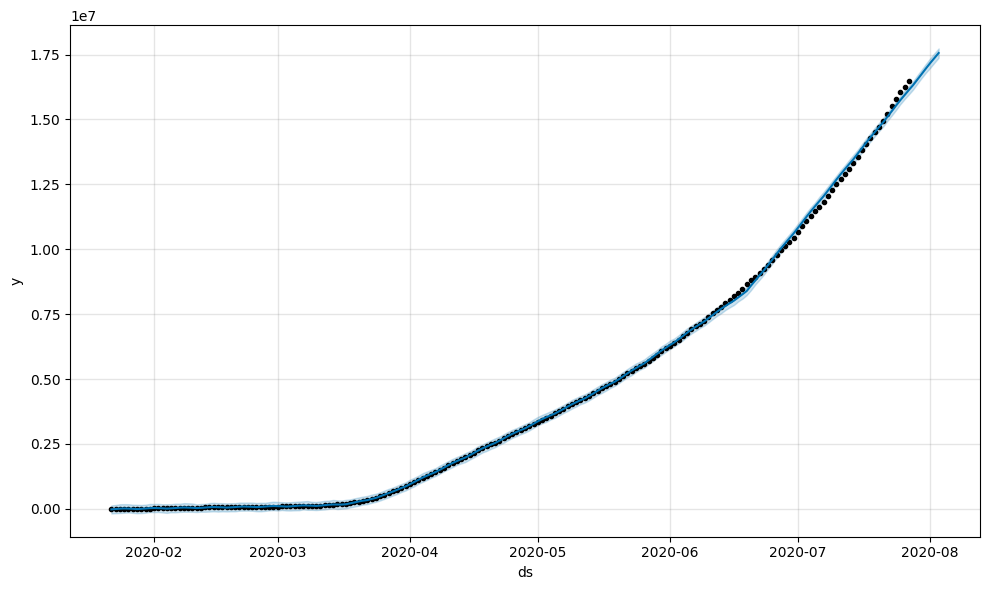

In [71]:
Confirmed_forecast_plot = m.plot(forecast)

**FORCAST ON DEATH CASES:**

In [76]:
death.columns = ["ds","y"]
death["ds"]=pd.to_datetime(death["ds"])

In [79]:
m = Prophet()

In [80]:
m.fit(death)
future = m.make_future_dataframe(periods = 7,freq='D')

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz7b8pbhr/tdn34_ud.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz7b8pbhr/5y3t2ptc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16474', 'data', 'file=/tmp/tmpz7b8pbhr/tdn34_ud.json', 'init=/tmp/tmpz7b8pbhr/5y3t2ptc.json', 'output', 'file=/tmp/tmpz7b8pbhr/prophet_modelgtp89mh8/prophet_model-20231207081937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [81]:
future.tail()

,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [85]:
forecast=m.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,663491.395651,661525.354051,665520.841272
191,2020-07-31,669006.394312,666680.749105,671140.551339
192,2020-08-01,673888.426957,671296.170823,676304.093935
193,2020-08-02,678025.345020,675495.637510,680502.531343
194,2020-08-03,682315.659400,679615.478302,685237.571236


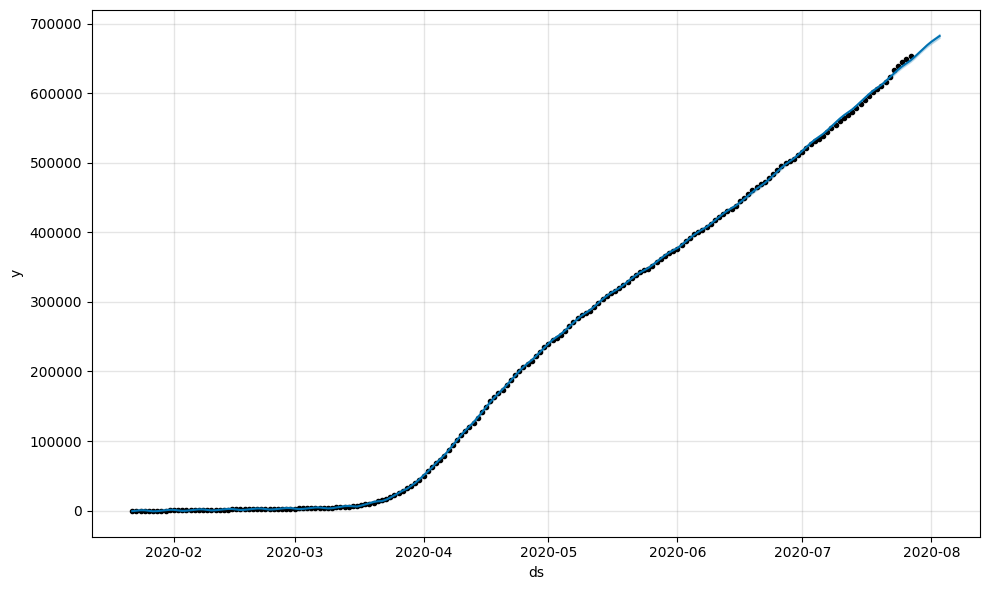

In [86]:
death_forecast_plot=m.plot(forecast)

**FORECAST ON RECOVERED CASES:**

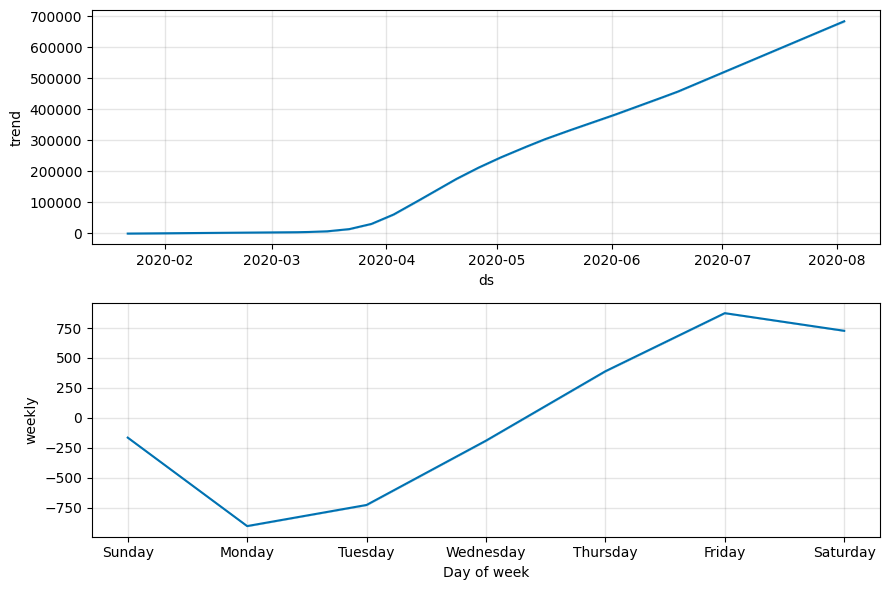

In [87]:
confirmed_forecast_plot=m.plot_components(forecast)

**FORECAST FOR RECOVERED CASES:**

In [89]:
recovered.columns = ["ds","y"]
recovered["ds"]=pd.to_datetime(recovered["ds"])

In [94]:
m=Prophet()
m.fit(recovered)
future=m.make_future_dataframe(periods=7,freq='D')
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz7b8pbhr/n8zac2w4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz7b8pbhr/9_8k92bl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12201', 'data', 'file=/tmp/tmpz7b8pbhr/n8zac2w4.json', 'init=/tmp/tmpz7b8pbhr/9_8k92bl.json', 'output', 'file=/tmp/tmpz7b8pbhr/prophet_modelvvhv2iy2/prophet_model-20231207085136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:51:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:51:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [95]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,9.595783e+06,9.517653e+06,9.674821e+06
191,2020-07-31,9.737182e+06,9.659520e+06,9.818166e+06
192,2020-08-01,9.877343e+06,9.792286e+06,9.957838e+06
193,2020-08-02,1.000332e+07,9.916493e+06,1.009007e+07
194,2020-08-03,1.013982e+07,1.005219e+07,1.022060e+07


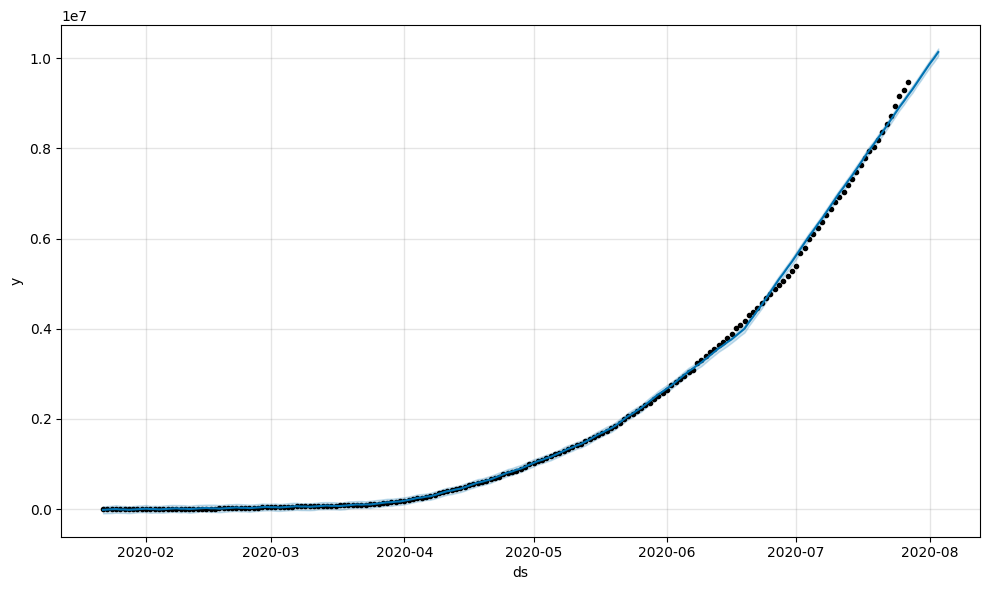

In [96]:
recovered_forecast_plot = m.plot(forecast)